# Esercitazione 9
## Filtraggio di immagini
#### Sommario
In questa esercitazione vengono analizzate le tecniche di filtraggio delle immagini digitali mediante la trasformata discreta di Fourier bidimensionale. Dopo una prima fase di visualizzazione e comprensione della rappresentazione spettrale delle immagini, si implementano e sperimentano filtri passa basso e passa alto nel dominio delle frequenze. In particolare, si studia l'effetto del filtraggio attraverso la manipolazione dei coefficienti spettrali. Infine, si esplora una strategia alternativa di filtraggio basata sull'energia spettrale, che consente di eliminare i contributi meno significativi in termini di contenuto informativo.

In [2]:
import numpy as np
import matplotlib.pylab as plt
from scipy import fftpack as f
import numpy.fft as f

In [3]:
# ---------------------------
# Funzione per visualizzare la FFT 2D
# ---------------------------
def VisFourier(I, title_prefix=""):
    """
    Visualizza modulo e log(|F|+1) della FFT 2D di un'immagine.
    """
    F = f.fftshift(f.fft2(I))
    mag_F = np.abs(F)
    
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    axs[0].imshow(mag_F, cmap='gray')
    axs[0].set_title(f'{title_prefix} |F(u,v)|')
    axs[0].axis('on')
    
    axs[1].imshow(np.log1p(mag_F), cmap='gray')
    axs[1].set_title(f'{title_prefix} log(|F(u,v)|+1)')
    axs[1].axis('on')
    
    plt.show()

# ---------------------------
# Filtri
# ---------------------------
def lowpass_filter(I):
    """
    Filtro passa basso con soglia N/4
    """
    F = f.fft2(I)
    N = int(np.floor(I.shape[0] / 4))
    F_lp = np.zeros_like(F, dtype=complex)
    F_lp[:N, :N] = F[:N, :N]
    F_lp[-N:, -N:] = F[-N:, -N:]
    F_lp[-N:, :N] = F[-N:, :N]
    F_lp[:N, -N:] = F[:N, -N:]
    return f.ifft2(F_lp)

def lowpass_filter_alpha(I, alpha):
    """
    Filtro passa basso con parametro alpha in [0,1]
    """
    F = f.fft2(I)
    N = int(np.floor(I.shape[0] * alpha / 2))
    F_lp = np.zeros_like(F, dtype=complex)
    if N > 0:
        F_lp[:N, :N] = F[:N, :N]
        F_lp[-N:, -N:] = F[-N:, -N:]
        F_lp[-N:, :N] = F[-N:, :N]
        F_lp[:N, -N:] = F[:N, -N:]
    return f.ifft2(F_lp)

def highpass_filter_alpha(I, alpha):
    """
    Filtro passa alto con parametro alpha
    """
    F = f.fft2(I)
    N = int(np.floor(I.shape[0] * alpha / 2))
    F_hp = np.copy(F)
    if N > 0:
        F_hp[:N, :N] = 0
        F_hp[-N:, -N:] = 0
        F_hp[-N:, :N] = 0
        F_hp[:N, -N:] = 0
    return f.ifft2(F_hp)

def newfilter(I):
    """
    Mantiene solo i coefficienti con energia > energia media
    """
    F = f.fft2(I)
    mean_en = np.mean(np.abs(F)**2)
    mask = np.abs(F)**2 > mean_en
    print(f"Compression ratio = {np.sum(mask) / I.size:.2%}")
    F_f = np.zeros_like(F, dtype=complex)
    F_f[mask] = F[mask]
    return f.ifft2(F_f)

### 1. Digital images and 2-Dimensional DFT

(a) Leggere l'immagine `barbara.png` (scaricabile dalla cartella del corso) utilizzando il comando:

```python
np.array(plt.imread('barbara.png'), dtype='float64'),
```

(b) Visualizzare l'immagine utilizzando `imshow` con l'opzione `cmap='gray'` per visualizzarla in scala di grigi.

(c) Scrivere una funzione chiamata `VisFourier` che:

- effettui la trasformata di Fourier bidimensionale dell'immagine con `fft2` e usi `fftshift` per centrare la frequenza nulla;
- visualizzi prima il valore assoluto dei coefficienti della trasformata e successivamente il `log(|F| + 1)`.


Esercizio 1 – Digital images and 2D DFT


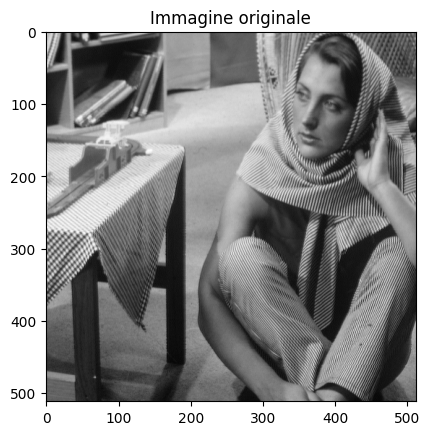

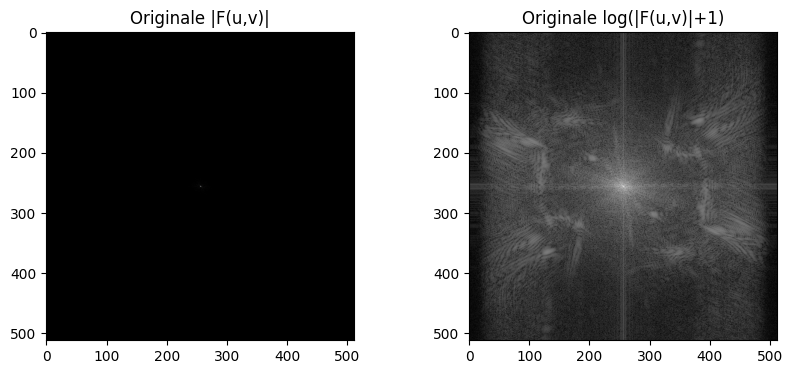

In [4]:
# ===========================
# ESERCIZIO 1 – Digital images and 2D DFT
# ===========================
print("Esercizio 1 – Digital images and 2D DFT")

I = np.array(plt.imread('barbara.png'), dtype='float64')

# (a) Visualizzazione immagine
plt.imshow(I, cmap='gray')
plt.title('Immagine originale')
plt.axis('on')
plt.show()

# (b-c) FFT dell'immagine
VisFourier(I, "Originale")

### 2. Low pass filtering

(a) Scrivere una funzione che prenda in input un'immagine e applichi un filtro passa basso. Data un'immagine di dimensione $N	imes N$, il filtro passa basso azzera tutti i coefficienti corrispondenti alle frequenze superiori a $N/4$ e inferiori a $-N/4$ nelle due dimensioni. La funzione restituisce in output l'immagine filtrata.

(b) Utilizzare la funzione creata al punto precedente per applicare il filtro passa basso all'immagine `barbara.png` e visualizzare il risultato ottenuto. Utilizzare `VisFourier` per visualizzare anche i coefficienti della trasformata di Fourier dell'immagine filtrata.

(c) Scrivere una funzione simile alla precedente in cui si inserisca un parametro $\alpha \in [0,1]$ che controlli quante frequenze conservare: se $\alpha=1$ si conservano tutti i coefficienti, se $\alpha=0$ si azzerano tutti i coefficienti.

(d) Applicare la funzione creata al punto precedente all'immagine `barbara.png` per i valori $\alpha = [0,\ 0.05,\ 0.1,\ 0.2,\ 0.7]$ e visualizzare i risultati ottenuti (sia l'immagine filtrata che i coefficienti della trasformata).


Esercizio 2 – Low pass filtering


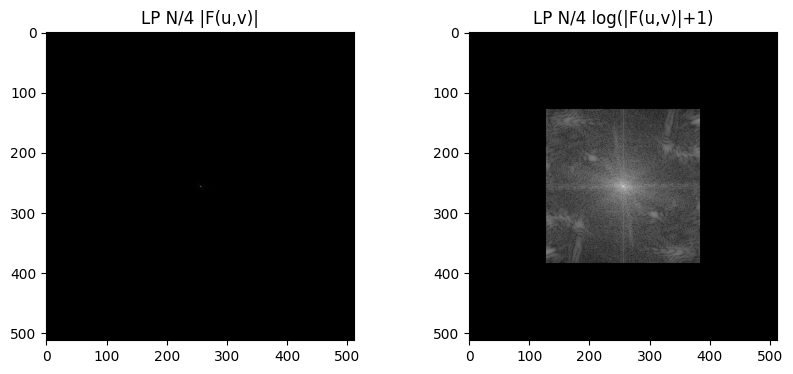

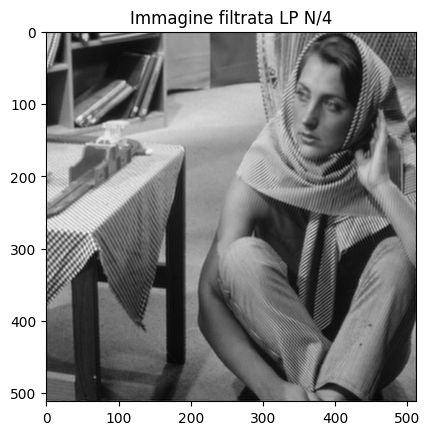

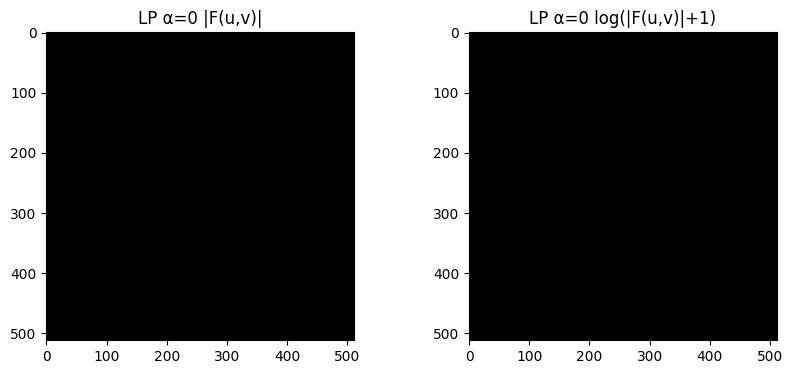

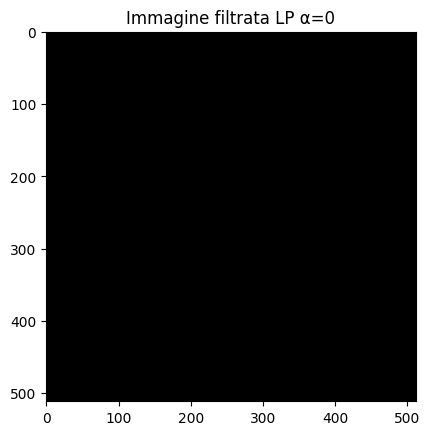

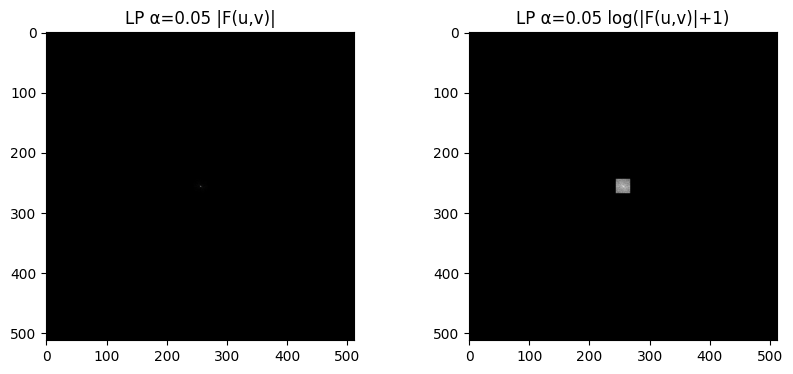

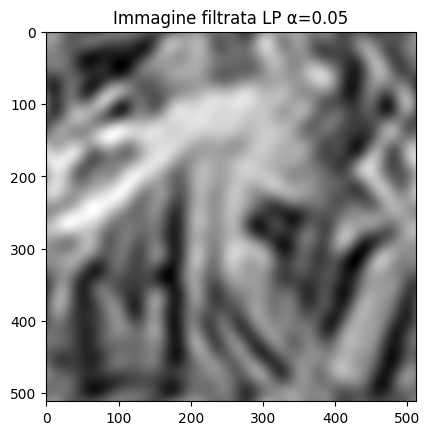

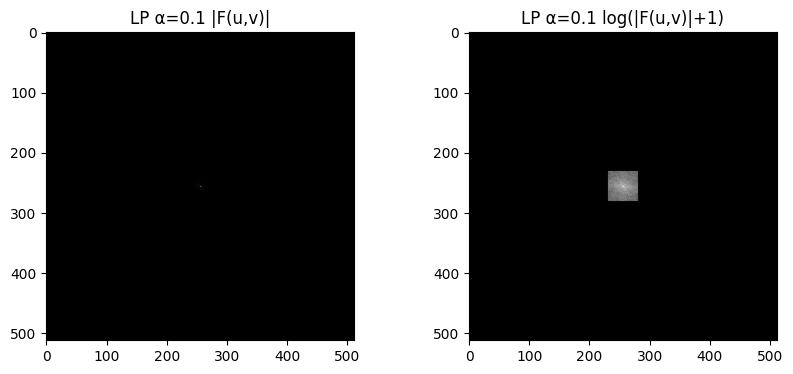

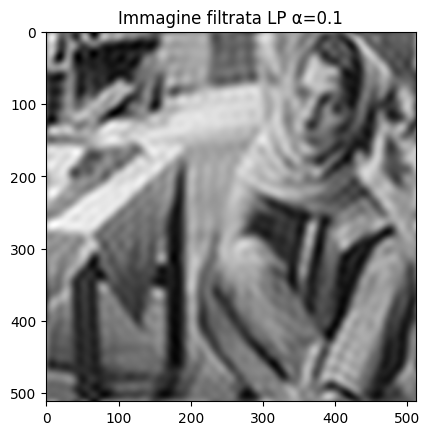

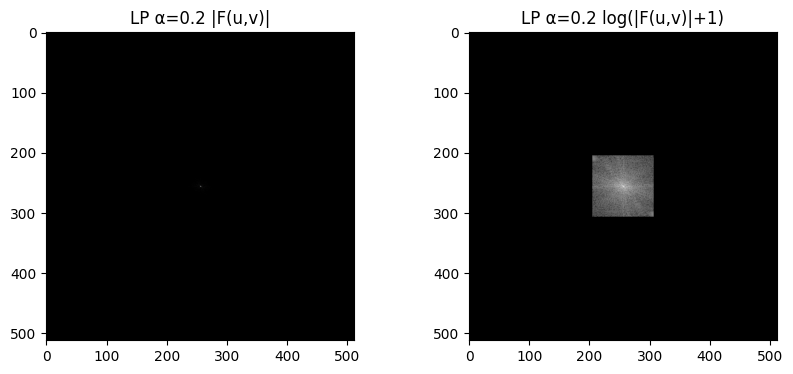

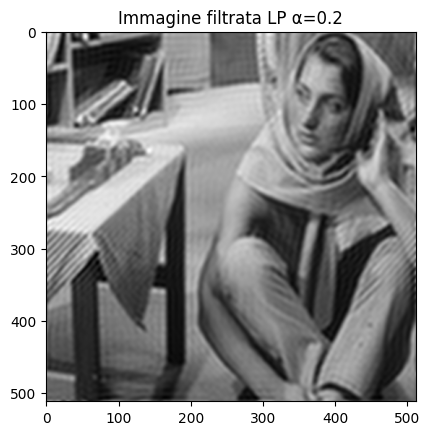

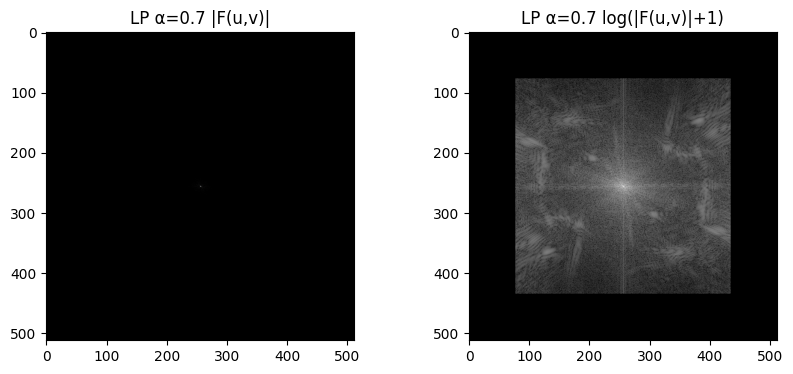

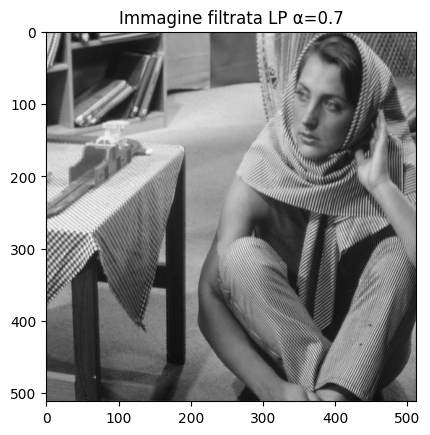

In [5]:
# ===========================
# ESERCIZIO 2 – Low pass filtering
# ===========================
print("Esercizio 2 – Low pass filtering")

# (a-b) Passa basso N/4
I_lp = lowpass_filter(I)
VisFourier(I_lp, "LP N/4")
plt.imshow(np.real(I_lp), cmap='gray')
plt.title('Immagine filtrata LP N/4')
plt.axis('on')
plt.show()

# (c-d) Passa basso con alpha
alpha_vals = [0, 0.05, 0.1, 0.2, 0.7]
for alpha in alpha_vals:
    I_lpa = lowpass_filter_alpha(I, alpha)
    VisFourier(I_lpa, f"LP α={alpha}")
    plt.imshow(np.real(I_lpa), cmap='gray')
    plt.title(f'Immagine filtrata LP α={alpha}')
    plt.axis('on')
    plt.show()

### 3. High pass filtering

(a) Scrivere una funzione che applichi un filtro passa alto. Data un'immagine di dimensione $N	imes N$ e un parametro $\alpha$, il filtro passa alto azzera tutti i coefficienti corrispondenti alle frequenze comprese tra $-\alpha\cdot N/2$ e $\alpha\cdot N/2$ nelle due dimensioni.

(b) Applicare la funzione creata al punto precedente all'immagine `barbara.png` per i valori $\alpha = [0,\ 0.05,\ 0.1,\ 0.2,\ 0.7]$ e visualizzare i risultati ottenuti (sia l'immagine filtrata che i coefficienti della trasformata).

(c) Provare un metodo alternativo di filtraggio in dominio di Fourier che elimini i coefficienti meno espressi, ad esempio i coefficienti la cui energia è minore dell'energia media, e visualizzare il risultato.


Esercizio 3 – High pass filtering


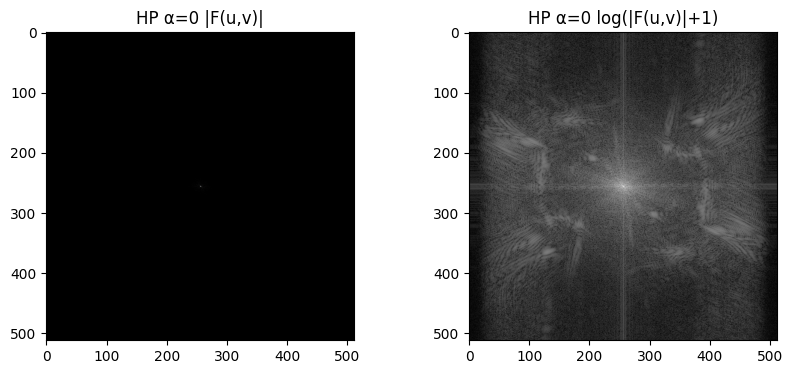

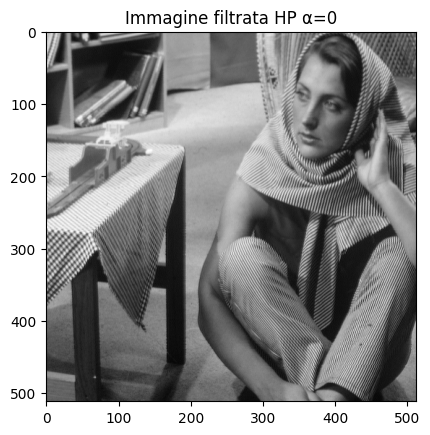

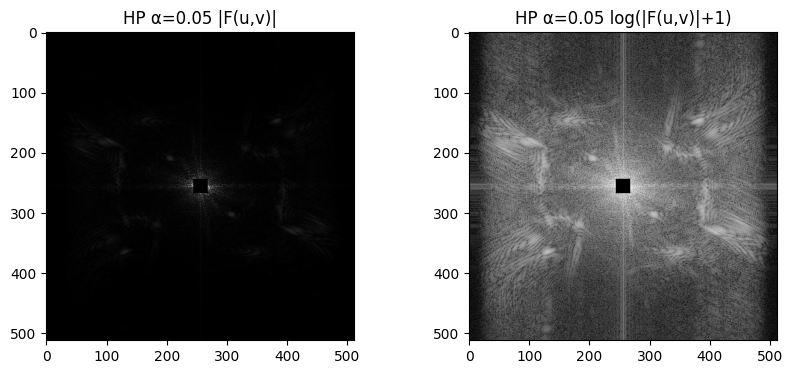

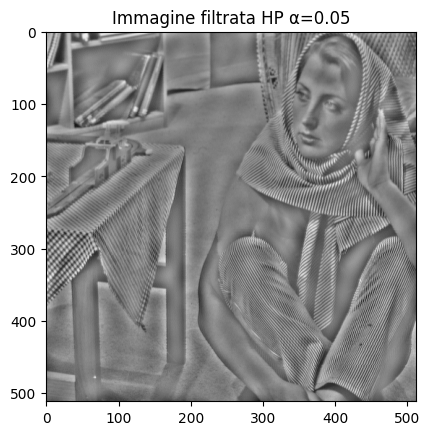

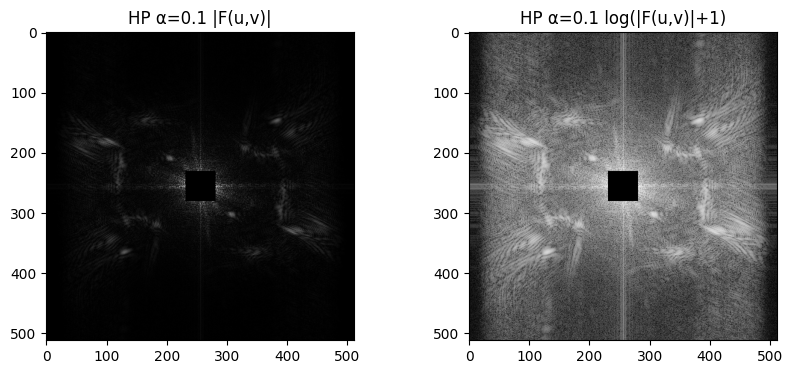

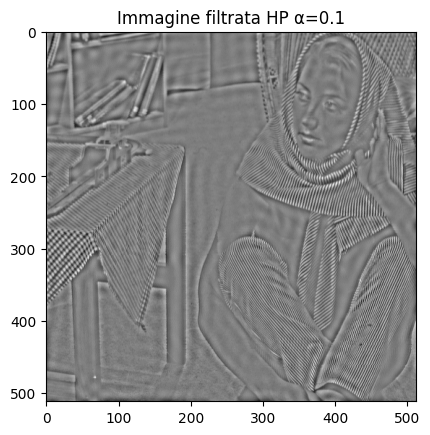

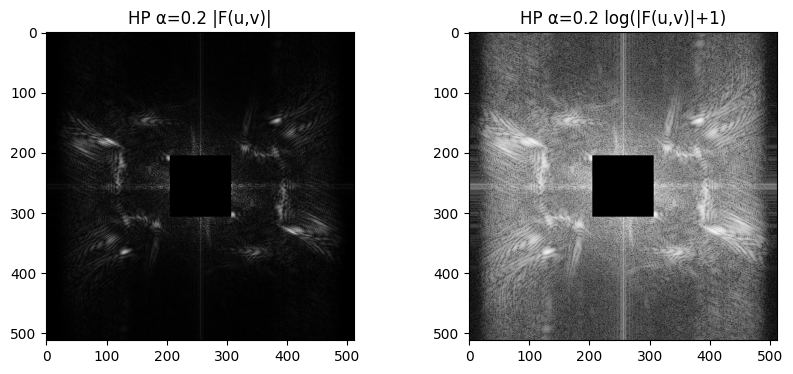

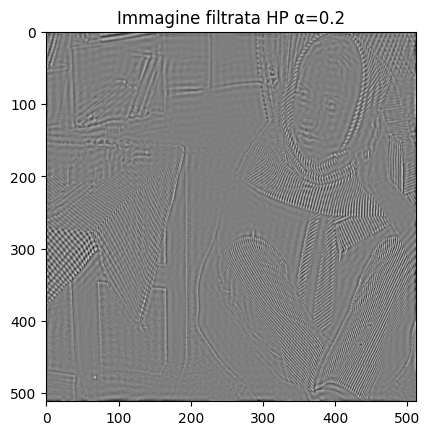

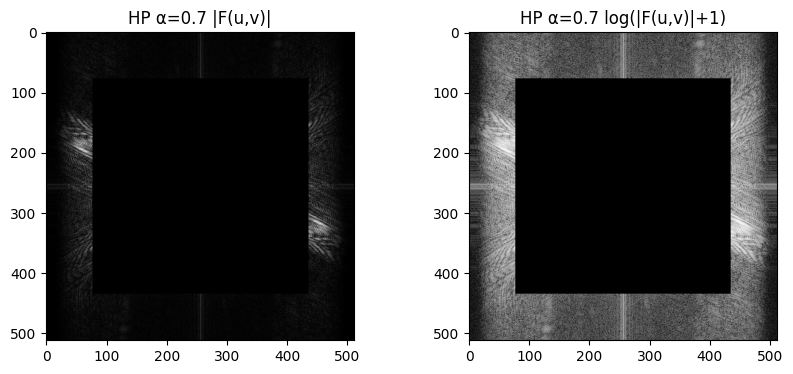

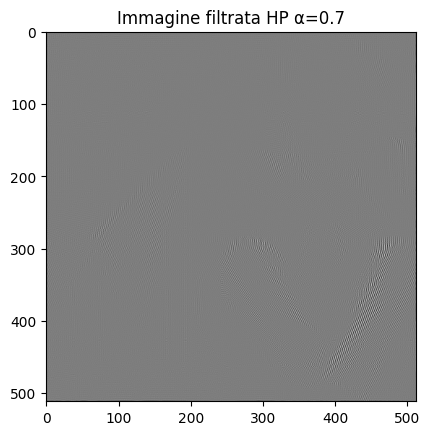

Compression ratio = 0.82%


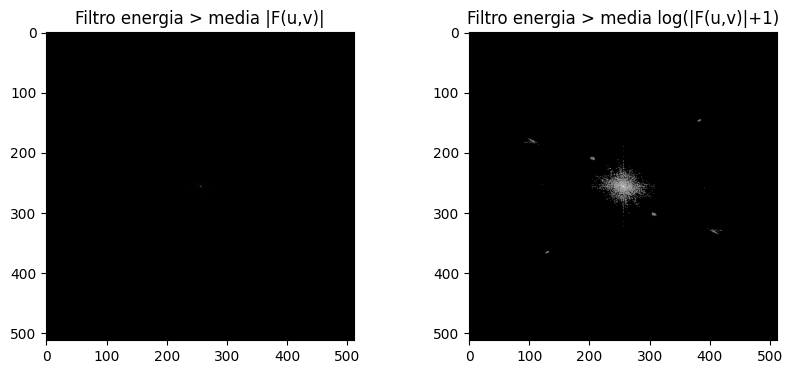

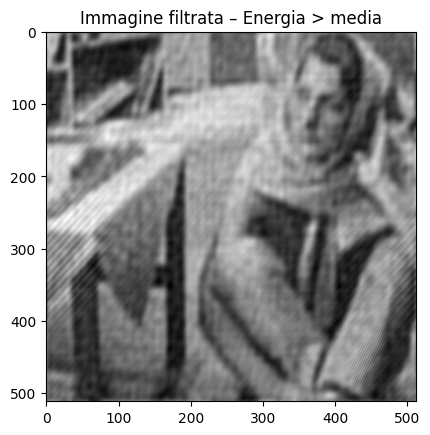

In [6]:
# ===========================
# ESERCIZIO 3 – High pass filtering
# ===========================
print("Esercizio 3 – High pass filtering")

# (a-b) Passa alto con alpha
for alpha in alpha_vals:
    I_hpa = highpass_filter_alpha(I, alpha)
    VisFourier(I_hpa, f"HP α={alpha}")
    plt.imshow(np.real(I_hpa), cmap='gray')
    plt.title(f'Immagine filtrata HP α={alpha}')
    plt.axis('on')
    plt.show()

# (c) Nuovo metodo di filtraggio
I_f = newfilter(I)
VisFourier(I_f, "Filtro energia > media")
plt.imshow(np.real(I_f), cmap='gray')
plt.title('Immagine filtrata – Energia > media')
plt.axis('on')
plt.show()